# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | papar
Processing Record 4 of Set 1 | paamiut
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | hami
Processing Record 9 of Set 1 | abu jubayhah
City not found. Skipping...
Processing Record 10 of Set 1 | sangar
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | kirakira
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | nong kung si
Processing Record 18 of Set 1 | sulangan
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | torit
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,18.78,90,4,1.54,ZA,1675227998
1,albany,42.6001,-73.9662,-7.02,61,98,1.31,US,1675228167
2,papar,5.7333,115.9333,30.00,74,81,2.35,MY,1675228089
3,paamiut,61.9940,-49.6678,-9.83,73,100,4.70,GL,1675228198
4,qaanaaq,77.4840,-69.3632,-22.46,51,78,3.27,GL,1675228199


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,90,4,1.54,ZA,1675227998
1,albany,42.6001,-73.9662,-7.02,61,98,1.31,US,1675228167
2,papar,5.7333,115.9333,30.00,74,81,2.35,MY,1675228089
3,paamiut,61.9940,-49.6678,-9.83,73,100,4.70,GL,1675228198
4,qaanaaq,77.4840,-69.3632,-22.46,51,78,3.27,GL,1675228199


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

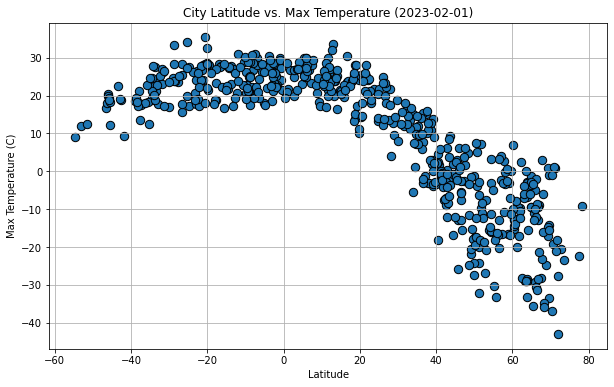

In [23]:
# Build scatter plot for latitude vs. temperature
x_value = city_data_df["Lat"]
y_value = city_data_df["Max Temp"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/TempLatGlobal.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

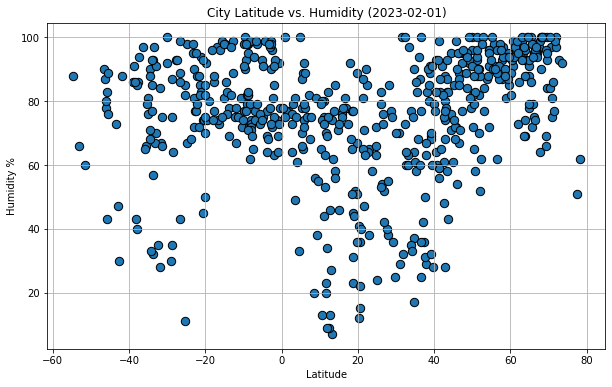

In [24]:
# Build scatter plot for latitude vs. humidity
x_value = city_data_df["Lat"]
y_value = city_data_df["Humidity"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumLatGlobal.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

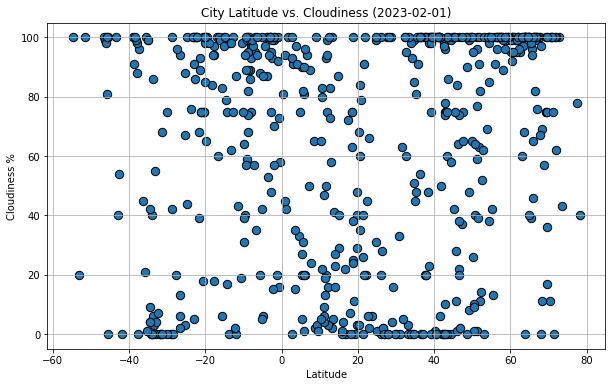

In [25]:
# Build scatter plot for latitude vs. cloudiness
x_value = city_data_df["Lat"]
y_value = city_data_df["Cloudiness"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudLatGlobal.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

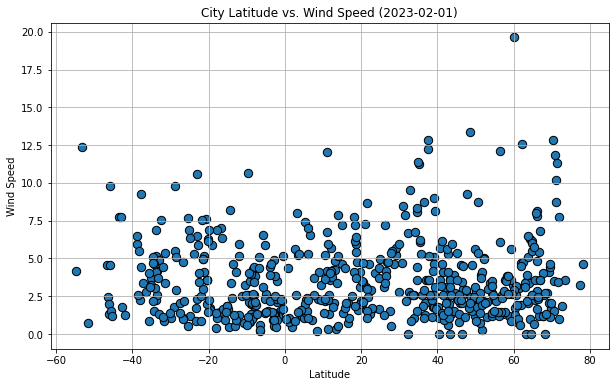

In [26]:
# Build scatter plot for latitude vs. wind speed
x_value = city_data_df["Lat"]
y_value = city_data_df["Wind Speed"]
plt.figure(figsize=(10,6))
plt.scatter(x_value,y_value, edgecolors='black',s=70)

# Incorporate the other graph properties
date = pd.to_datetime(city_data_df["Date"][0],unit="s").date()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindLatGlobal.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def lin_reg_plots(x,y,xlabel,ylabel,title):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    # Create a line
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot scatter plot
    plt.scatter(x,y)
    # Plot regression line
    plt.plot(x,regress_values,"red")
    # Label plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Print r square value
    print(f"R squared: {rvalue**2}")
    # Show plot
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,-7.02,61,98,1.31,US,1675228167
2,papar,5.7333,115.9333,30.00,74,81,2.35,MY,1675228089
3,paamiut,61.9940,-49.6678,-9.83,73,100,4.70,GL,1675228198
4,qaanaaq,77.4840,-69.3632,-22.46,51,78,3.27,GL,1675228199
5,hilo,19.7297,-155.0900,24.60,89,40,3.09,US,1675227953


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,90,4,1.54,ZA,1675227998
6,chuy,-33.6971,-53.4616,20.97,93,6,2.27,UY,1675228199
9,rikitea,-23.1203,-134.9692,26.12,72,5,6.47,PF,1675228201
10,port alfred,-33.5906,26.8910,21.21,97,3,2.61,ZA,1675228201
11,kirakira,-10.4544,161.9205,28.75,72,98,3.24,SB,1675228063


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7545050836371685


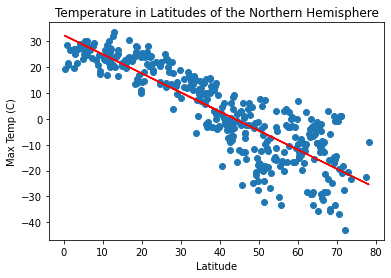

<Figure size 432x288 with 0 Axes>

In [43]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
xlabel="Latitude"
ylabel="Max Temp (C)"
title = "Temperature in Latitudes of the Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/TempLatN.png")

R squared: 0.22285901121287086


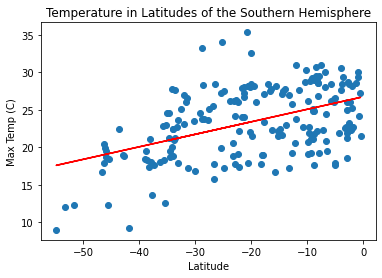

<Figure size 432x288 with 0 Axes>

In [44]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
xlabel="Latitude"
ylabel="Max Temp (C)"
title = "Temperature in Latitudes of the Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/TempLatS.png")

**Discussion about the linear relationship:** 
- Temperature increases as it approaches a Latitude of 0, the Equator. 
- Temperatures in the Southern hemisphere sampled data varies more than temperatures in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.245435784596101


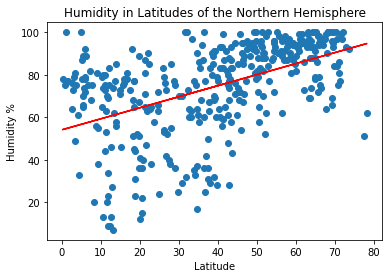

<Figure size 432x288 with 0 Axes>

In [45]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
xlabel="Latitude"
ylabel="Humidity %"
title = "Humidity in Latitudes of the Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/HumLatN.png")

R squared: 0.05120380344843658


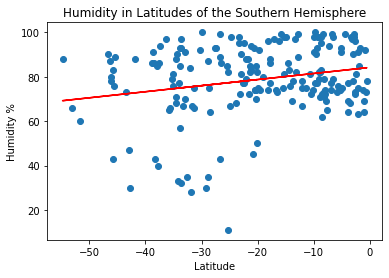

<Figure size 432x288 with 0 Axes>

In [46]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
xlabel="Latitude"
ylabel="Humidity %"
title = "Humidity in Latitudes of the Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/HumLatS.png")


**Discussion about the linear relationship:** 
- Humidity does not have a strong correlation with Latitude globally.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.1295759763904946


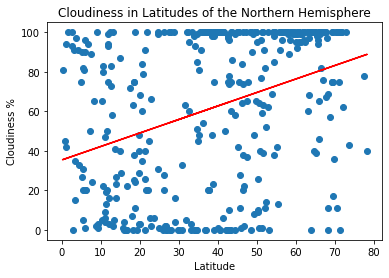

<Figure size 432x288 with 0 Axes>

In [19]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
xlabel="Latitude"
ylabel="Cloudiness %"
title = "Cloudiness in Latitudes of the Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/CloudLatN.png")

R squared: 0.04969336270071839


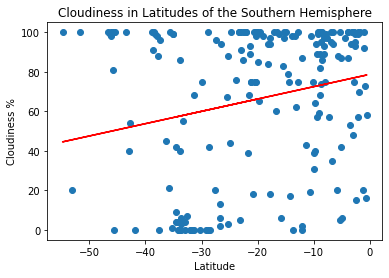

<Figure size 432x288 with 0 Axes>

In [20]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
xlabel="Latitude"
ylabel="Cloudiness %"
title = "Cloudiness in Latitudes of the Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/CloudLatS.png")

**Discussion about the linear relationship:**
- Cloudiness does not have a strong correlation with Latitude globally.
- There is a suspicious number of locations that have either 0 or 100% cloudiness which makes me question how this is measured.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0010680970831431166


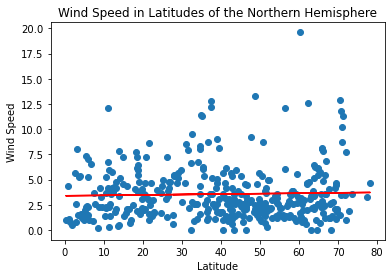

<Figure size 432x288 with 0 Axes>

In [21]:
# Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
xlabel="Latitude"
ylabel="Wind Speed"
title = "Wind Speed in Latitudes of the Northern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/WindLatN.png")

R squared: 0.07826164784203873


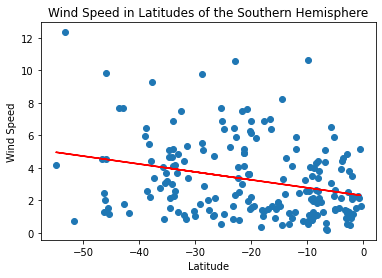

<Figure size 432x288 with 0 Axes>

In [22]:
# Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
xlabel="Latitude"
ylabel="Wind Speed"
title = "Wind Speed in Latitudes of the Southern Hemisphere"
lin_reg_plots(x,y,xlabel,ylabel,title)
# Save the figure
plt.savefig("output_data/WindLatS.png")

**Discussion about the linear relationship:**
- In the sample set I have, the wind speed in the Northern hemisphere is consistent with many locations grouped around 3.